Давайте с вами решим многоклассовую задачу, но теперь с использованием более верхнеуровневого фреймворка PyTorch.

Для этого мы возьмём датасет MNIST. Он очень похож на Digits из предыдущего задания и тоже содержит черно-белые рукописные цифры от 0 до 9, только размер уже 28х28 пикселей.

Вообще, MNIST — знаковый датасет для глубокого обучения, именно для него Yahn LeCun разработал первую свёрточную нейросеть LeNet и применил для её обучения механизм обратного распространения ошибки, что дало сильный толчок в развитии нейронных сетей и глубокого обучения в целом.

В этом задании вам придется много опираться на ноутбук ipynb, в котором мы знакомились с основными элементами PyTorch

# Финальное задание PyTorch

Начнем с основных импортов и определения констант - доступного девайса для вычислений и параметров, которые зависят от выборки

In [26]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# выбор девайса
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# параметры, которые зависят от нашего датасета
input_size = 784
num_classes = 10

device

device(type='cuda')

Предлагаем вам попробовать выбрать самим гиперпараметры обучения

In [27]:
# выберите сами данные параметры
num_epochs = 500
batch_size = 500
learning_rate = 0.1

Загружаем датасет MNIST - он есть в стандартном наборе датасетов pytorch, выбираем transform=ToTensor(), это важно!

In [28]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# transform.ToTensor() записывает данные в torch.tensor и нормализовывает данные,
# разделяя значения каждого пикселя на 255

Настраиваем dataloader - объект, который датасет 

In [29]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [30]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

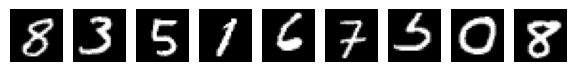

In [31]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 10, 1
for i in range(1, 10):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [43]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        # сконструируйте свою сеть, опишите слои, которые будут использоваться
        # достаточно будет двух линейных слоев с ReLU после первого,
        # но мы оставляем этот выбор вам, можно составить любую сеть
        # SoftMax указывать не нужно 
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, input_size),
            nn.ReLU(),
            nn.Linear(input_size, num_classes),
        )
    
    def forward(self, x):
        # опишите функцию forward, то есть проход по вашей сети
        # результат применения x к первому слою отдайте на вход функции активации
        # выход функции активации отправьте на вход следущему слою и так далее
        x = self.flatten(x)
        out = self.linear_relu_stack(x)
        return out

model = NeuralNet(input_size, num_classes).to(device)

In [44]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss() 
# в качестве функции потерь используем Cross Entropy
# в PyTorch кросс энтропия реализована с помощью LogSoftmax и 
# Negative Log Likelyhood loss, что на самом деле даёт такой же результат
# Так как мы не указали внутри сети SoftMax и он учтен только в Loss функции,
# при тестировании сети нам нужно учесть этот факт и руками интерпретировать выход сети


optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)
# выберите оптимизатор (вариантов много - SGD, AdaGrad, Adam, RMSProp и т.д.)
# параметры для оптимизатора, передайте в скобках в предыдущей строке(model.parameters(), lr=learning_rate)  
# почитать про оптимизаторы можно тут https://pytorch.org/docs/stable/optim.html

In [45]:
# Train
total_step = len(train_loader)
for epoch in range(num_epochs):
    # получаем батч
    for i, (images, labels) in enumerate(train_loader):  
        # запишем данные в строку
        images = images.reshape(-1,28,28,1).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backprpagation and optimization
        optimizer.zero_grad()
        # считаем градиенты
        loss.backward()
        # обновляем параметры
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/500], Step [100/120], Loss: 0.1885
Epoch [2/500], Step [100/120], Loss: 0.1350
Epoch [3/500], Step [100/120], Loss: 0.1055
Epoch [4/500], Step [100/120], Loss: 0.0767
Epoch [5/500], Step [100/120], Loss: 0.0686
Epoch [6/500], Step [100/120], Loss: 0.0714
Epoch [7/500], Step [100/120], Loss: 0.0526
Epoch [8/500], Step [100/120], Loss: 0.0403
Epoch [9/500], Step [100/120], Loss: 0.0366
Epoch [10/500], Step [100/120], Loss: 0.0431
Epoch [11/500], Step [100/120], Loss: 0.0381
Epoch [12/500], Step [100/120], Loss: 0.0221
Epoch [13/500], Step [100/120], Loss: 0.0339
Epoch [14/500], Step [100/120], Loss: 0.0283
Epoch [15/500], Step [100/120], Loss: 0.0323
Epoch [16/500], Step [100/120], Loss: 0.0154
Epoch [17/500], Step [100/120], Loss: 0.0175
Epoch [18/500], Step [100/120], Loss: 0.0280
Epoch [19/500], Step [100/120], Loss: 0.0239
Epoch [20/500], Step [100/120], Loss: 0.0162
Epoch [21/500], Step [100/120], Loss: 0.0134
Epoch [22/500], Step [100/120], Loss: 0.0165
Epoch [23/500], Ste

In [46]:


# test
# так как мы не использовали софтмакс, то берем максимум от выхода сети
# и считаем что индекс этого класса и есть наш ответ
# для интерпретируемости можно при тестировании добавить SM на выход
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28,28,1).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 97.53 %


tensor(7, device='cuda:0')
tensor(3, device='cuda:0')
tensor(9, device='cuda:0')
Test accuracy is 97.53


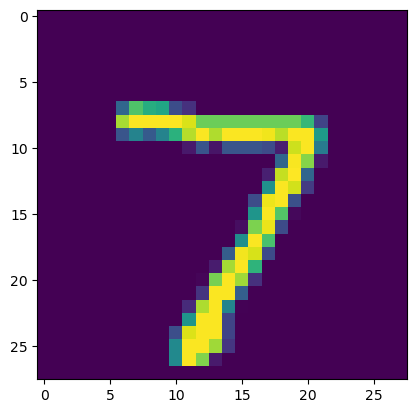

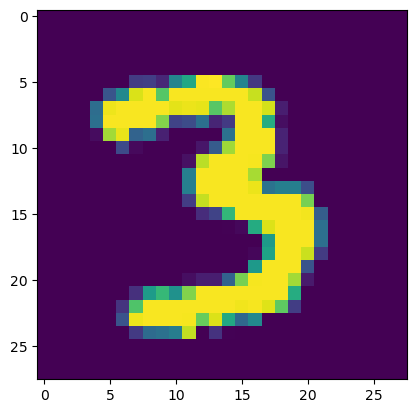

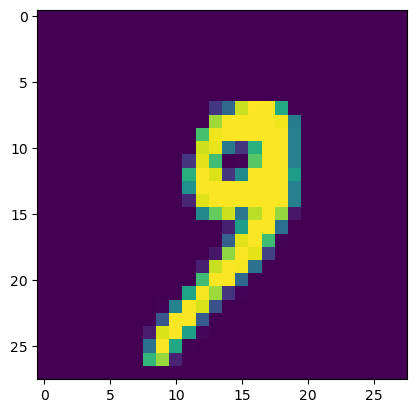

In [47]:
import matplotlib.pyplot as plt
batch_counter = 0

total = 0
correct = 0
for images, labels in test_loader:

    images_flat = images.reshape(-1, 28 * 28).to(device)
    labels = labels.to(device)
    outputs = model(images_flat)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    # отрисуем несколько примеров и выведем наши ответы на них
    if (batch_counter < 3):
        plt.figure(batch_counter)
        plt.imshow(images[0][0])
        print(predicted.data[0])
    batch_counter += 1

print("Test accuracy is {}".format(100 * correct/total))



Если точность на тесте больше 0.8 — поздравляем с выполнением задания!